In [6]:
import sys

sys.path.insert(0, "..")

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.collections import PolyCollection

from funbin.einstein.ported import base_tile_state, extended_state
from funbin.geometry import Box

In [8]:
def iterate(n: int):
    s = base_tile_state()
    for _ in range(n):
        s = extended_state(s)
    return s

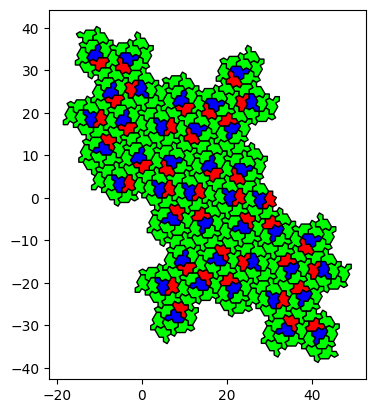

In [9]:
fig, ax = plt.subplots()

colormap = {
    "single": [0.0, 1.0, 0.0],
    "unflipped": [1.0, 0.0, 0.0],
    "flipped": [0.0, 0.0, 1.0],
}

state = iterate(3)
labeled_polygons = state.H7.as_polygons(1.0, 1.0)

pc = PolyCollection(
    [p.verts for p, _ in labeled_polygons],
    facecolors=[colormap[label] for _, label in labeled_polygons],
    edgecolors="black",
    # linewidth=0.3,
    # facecolors="none",
)
ax.clear()
ax.add_collection(pc)
ax.set_aspect("equal")
Box.bounding_all([p for p, _ in labeled_polygons]).resized(1.1).fit_axes(ax)

In [17]:
from tqdm import trange

from funbin.einstein import aperiodic_monotile
from funbin.geometry import SpatialIndex, rectanglize_tiling

niter_max = 6
size_samples = 30
sizes_per_niter = []

for niter in range(niter_max):
    print(f"niter = {niter}")
    raw = aperiodic_monotile(niter=niter)
    print("computing border...")
    border = SpatialIndex.from_polygons(raw).border_edges
    print(f"border computed: {len(border)}")
    sizes = []
    for _ in trange(size_samples):
        tiling = rectanglize_tiling(
            raw,
            target_bins=(10000, 10000),
            max_tries=3,
            border_edges_precomputed=border,
        )
        sizes.append(len(tiling))
    sizes_per_niter.append(sizes)

niter = 0
computing border...
border computed: 14


100%|██████████| 30/30 [00:00<00:00, 124.57it/s]


niter = 1
computing border...
border computed: 42


100%|██████████| 30/30 [00:00<00:00, 60.70it/s]


niter = 2
computing border...
border computed: 146


100%|██████████| 30/30 [00:01<00:00, 22.58it/s]


niter = 3
computing border...
border computed: 534


100%|██████████| 30/30 [00:04<00:00,  6.23it/s]


niter = 4
computing border...
border computed: 1982


100%|██████████| 30/30 [00:25<00:00,  1.17it/s]


niter = 5
computing border...
border computed: 7386


100%|██████████| 30/30 [02:15<00:00,  4.50s/it]


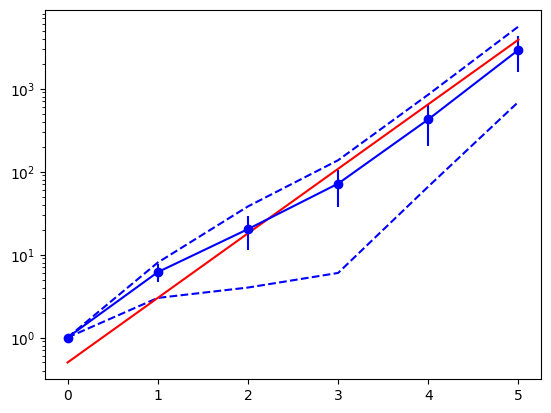

In [ ]:
import numpy as np

fig, ax = plt.subplots()

means = [np.mean(sizes) for sizes in sizes_per_niter]
stds = [np.std(sizes) for sizes in sizes_per_niter]

niter_grid = np.array(list(range(niter_max)))
ax.errorbar(niter_grid, means, stds, marker="o", color="blue")

for sel in (np.min, np.max):
    extreme = [sel(sizes) for sizes in sizes_per_niter]
    ax.plot(niter_grid, extreme, "--", color="blue")

ax.plot(niter_grid, 0.5 * 6**niter_grid, color="red")

ax.set_yscale("log")

In [30]:
0.5 * 6**niter_grid

array([5.000e-01, 3.000e+00, 1.800e+01, 1.080e+02, 6.480e+02, 3.888e+03])